<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/NN_Arquitectura_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BootCamp Integrador - Semana 2**

# **Construcción de una red neuronal simple con Keras**


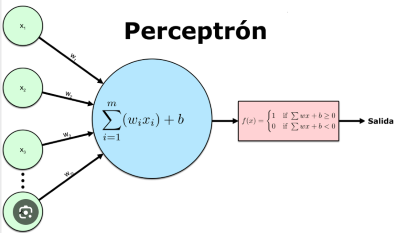

**Perceptrón** es la unidad más simple de una red neuronal artificial

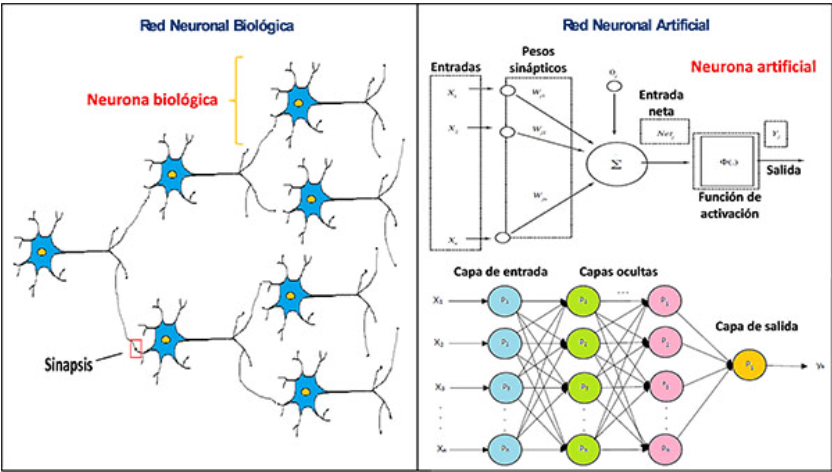

# **Conceptos Importantes**

1. Una red neuronal artificial es un modelo computacional inspirado en el cerebro humano.
Está formada por capas de nodos (neuronas artificiales) que transforman datos de entrada en salidas  a través de funciones matemáticas.

2. Una red neuronal funciona como una cascada de operaciones matemáticas.
Cada neurona recibe entradas, les aplica un peso, suma todo y pasa el resultado por una función de activación.

3. El bloque básico es el perceptrón: Una entrada ponderada que pasa por una función de activación.



In [ ]:
#  Construcción de una red neuronal simple con Keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Aquí estamos cargando las librerías:**

tensorflow.keras: para construir y entrenar la red neuronal. (https://keras.io/)

sklearn: para cargar el dataset Iris y preparar los datos. (https://scikit-learn.org/stable/)

In [ ]:
# Cargar y preparar el dataset Iris
data = load_iris()
X = data.data
y = to_categorical(data.target)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. load_iris() carga un dataset muy común que contiene información sobre flores (4 características, 3 clases).
2. to_categorical convierte las etiquetas (0, 1, 2) en formato one-hot para clasificación multiclase.
3. Normalizamos los datos para que todas las variables tengan igual escala.
4. Luego dividimos el dataset en entrenamiento (80%) y prueba (20%).

In [ ]:
# Definir el modelo
model = Sequential([
    Input(shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

1. Sequential define una red capa por capa.
2. Input(shape=(4,)) indica que cada muestra tiene 4 características.
3. Dense(8, activation='relu') es una capa oculta con 8 neuronas y ReLU como activación.
4. Dense(3, activation='softmax') es la capa de salida, con 3 neuronas (una por clase).
5. summary() muestra la estructura del modelo.

# Explicación en detalle

🔵 **Capa De Entrada**

Esta capa no tiene neuronas ni pesos; solo define el tamaño de los datos de entrada.

En este caso, cada muestra tiene 4 características (porque el dataset Iris tiene 4 variables: largo del sépalo, ancho del sépalo, largo del pétalo, ancho del pétalo).

No realiza cálculos por sí sola, simplemente especifica el formato de entrada al modelo.

In [ ]:
Input(shape=(4,))

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_3>

 🔵 **Capa Oculta**

Es una capa densa (fully connected): cada una de sus 8 neuronas recibe las 4 entradas y genera una salida.

Tiene pesos y sesgos entrenables.

Usa la función de activación ReLU: deja pasar valores positivos y corta los negativos a 0.

Aprende combinaciones no lineales


In [ ]:
Dense(8, activation='relu')

<Dense name=dense_2, built=False>

🔵 **Capa de Salida**

Tiene 3 neuronas, una para cada clase del dataset Iris (setosa, versicolor, virginica).

Usa softmax, que convierte las salidas en probabilidades que suman 1.

La clase con mayor probabilidad será la predicha por el modelo.

Devuelve probabilidades por clase.

In [ ]:
Dense(3, activation='softmax')

<Dense name=dense_3, built=False>

🔵 **Definición: Funciones de Activación**

Las funciones de activación introducen no linealidad en la red neuronal.
Sin ellas, la red sería solo una combinación lineal de los datos de entrada y no podría aprender relaciones complejas como “si pasa esto y esto pero no esto, entonces...”

Las funciones de activación actúan como filtros o puertas: dependiendo del valor que reciben, deciden qué pasa a la siguiente capa y qué no.

Sin ellas, la red sería como una calculadora lineal: incapaz de reconocer patrones complejos.

🔵 **¿Dónde se aplican las funciones de activación?**

Las funciones de activación se aplican típicamente en dos lugares:

Capas ocultas (dentro del modelo) → para permitir aprendizaje no lineal.

Capa de salida → para transformar la salida del modelo en un formato útil (como una probabilidad).


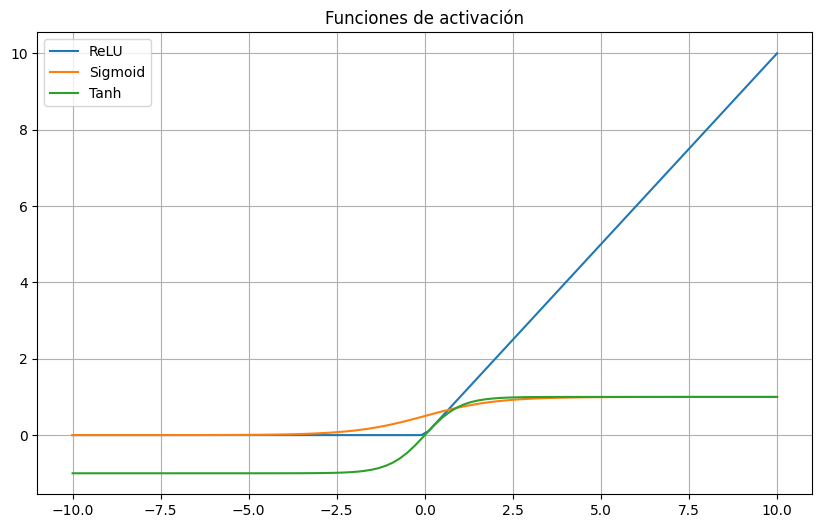

In [ ]:
# Funciones de Activación
x = np.linspace(-10, 10, 100) # Genera 100 valores equidistantes entre -10 y 10.

plt.figure(figsize=(10, 6))
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.title("Funciones de activación")
plt.legend()
plt.grid(True)
plt.show()

🔵 **Análisis de las funciones de Activación:**

**RELU**
ReLU = 0 si el valor es negativo, y = x si el valor es positivo.

**SIGMOID**
Función en forma de S que comprime los valores entre 0 y 1.
Desventaja: su derivada se vuelve muy pequeña lejos del centro → puede causar el problema de gradiente desvanecido.
Función en forma de S que comprime los valores entre 0 y 1.

**TANH**
Muy parecida a la sigmoid, pero centrada en 0 (produce salidas entre -1 y 1).
Tiene mejores propiedades para entrenamiento que la sigmoid.


🔵 **Analogía:**
Imagina que cada neurona es una persona que decide si una señal es fuerte o importante como para pasarla adelante. La función de activación es su ‘criterio de decisión’. ReLU solo escucha si es positivo. Sigmoid decide cuánto cree en una idea entre 0% y 100%. Tanh es como un optimista/pesimista: puede dar señales positivas o negativas.

🔵 **Recomendación Práctica:**

ReLU: preferida en capas ocultas modernas por su simplicidad y eficiencia.

Sigmoid: útil cuando quieres probabilidades (por ejemplo, salida binaria).

Tanh: mejor que sigmoid cuando necesitas salidas negativas y positivas.

<br/>

| Función     | ¿Cuándo usarla?                               | ¿Cuándo evitarla?                              | Ejemplo real                                        |
| ----------- | --------------------------------------------- | ---------------------------------------------- | --------------------------------------------------- |
| **ReLU**    | Capas ocultas en redes profundas              | Salida del modelo, datos negativos importantes | Clasificación de imágenes (MNIST, CIFAR)            |
| **Sigmoid** | Salida binaria (0 o 1)                        | Capas ocultas profundas, problemas multiclase  | Detección de fraude o spam                          |
| **Tanh**    | Capas ocultas con datos negativos y positivos | Capas profundas (problemas de gradiente)       | RNNs en análisis de sentimientos o series de tiempo |
| **Softmax** | Salida multiclase (una clase por ejemplo)     | Clasificación multilabel, capas ocultas        | Clasificación de especies de flor (Iris)            |

<br/>


🔵 **Funciones de Activación y arquitecturas de redes neuronales:**

<br/>

| Arquitectura     | Funciones típicas en capas internas | Capa de salida        |
| ---------------- | ----------------------------------- | --------------------- |
| **CNN**          | ReLU                                | Sigmoid / Softmax     |
| **RNN**          | Tanh o ReLU                         | Sigmoid / Softmax     |
| **Transformers** | GELU, ReLU, Swish                   | Softmax (para tokens) |

<br/>

🔵 **Cuándo usar GELU?**

<br/>

| ✔️ Usar GELU cuando...                       | ❌ Evitar si...                                        |
| -------------------------------------------- | ----------------------------------------------------- |
| Usas Transformers o modelos de NLP avanzados | Tienes una red simple y priorizas velocidad           |
| Quieres suavidad en la activación            | Estás limitado a hardware donde ReLU es más eficiente |
| Buscas un desempeño fino en NLP / visión     | No necesitas activaciones sofisticadas                |



🔵 **Definición: Funciones de Perdida**

Es una función matemática que cuantifica el error entre:

La salida predicha por el modelo, y

La salida real o esperada.

La función de pérdida es como una regla que mide qué tan mal se está portando el modelo. Le da una calificación de qué tan lejos está de la respuesta correcta, y el modelo usa esa calificación para mejorar.

🎯 El objetivo durante el entrenamiento es minimizar esa pérdida usando un algoritmo de optimización como Adam o SGD.

<br/>

| Función                       | ¿Para qué problema?      | Tipo de salida esperada | Ejemplo típico                   |
| ----------------------------- | ------------------------ | ----------------------- | -------------------------------- |
| MeanSquaredError (MSE)        | Regresión                | Valor real              | Predicción de precios            |
| MeanAbsoluteError (MAE)       | Regresión                | Valor real              | Predicción de temperatura        |
| BinaryCrossentropy            | Clasificación binaria    | Probabilidad (sigmoid)  | Detección de spam                |
| CategoricalCrossentropy       | Clasificación multiclase | One-hot + softmax       | Clasificación de flores (Iris)   |
| SparseCategoricalCrossentropy | Clasificación multiclase | Enteros + softmax       | Clasificación de dígitos (MNIST) |

<br/>

🔵 **Funciones de Perdida y arquitectura de redes neuronales**

<br/>

| Arquitectura     | Problema típico         | Activación salida | Función de pérdida                           |
| ---------------- | ----------------------- | ----------------- | -------------------------------------------- |
| **MLP**          | Clasificación tabular   | Sigmoid / Softmax | Binary / Categorical Crossentropy            |
| **CNN**          | Imágenes                | Sigmoid / Softmax | Binary / Categorical Crossentropy            |
| **RNN**          | Texto, series de tiempo | Sigmoid / Softmax | Binary / SparseCategoricalCrossentropy / MSE |
| **Transformers** | NLP avanzado            | Softmax           | SparseCategoricalCrossentropy                |


In [ ]:
# Funciones de Pérdida
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy

In [ ]:
# Ejemplo de cálculo de pérdida
y_true = [1, 0, 1]
y_pred = [0.9, 0.1, 0.8]

mse = MeanSquaredError()
bce = BinaryCrossentropy()
print("MSE:", mse(y_true, y_pred).numpy())
print("BCE:", bce(y_true, y_pred).numpy())

MSE: 0.020000001
BCE: 0.14462154


MSE es útil si el objetivo es aprender un número (regresión).

BCE es ideal si el objetivo es aprender una probabilidad de una clase (clasificación binaria).

Y aunque en este ejemplo ambas predicciones son buenas, la BCE refleja mejor el comportamiento probabilístico esperado de un clasificador.

🔵 **¿Qué significa entrenar un modelo?**

Entrenar un modelo significa ajustar sus pesos internos para que pueda predecir con la menor cantidad de error posible.

Durante el entrenamiento:

El modelo recibe entradas (X) y predice salidas (Ŷ).

Se compara esa predicción con la salida real (Y).

Se calcula un error (función de pérdida).

El modelo ajusta sus pesos usando ese error para aprender.

Este proceso se repite muchas veces (épocas) para que el modelo mejore.

🔵 **Proceso de entrenamiento paso a paso:**

Inicialización de pesos (aleatoria o según un esquema como He o Xavier)

Forward pass → el modelo hace una predicción (y_pred)

Cálculo de pérdida → con una función de pérdida (como MSE o BCE)

Backward pass (retropropagación) → se calculan los gradientes

Actualización de pesos → con un optimizador (como Adam, SGD)

🔄 Esto se repite por varias épocas con muchos minilotes (batches).

<br/>

🔵 **Conceptos Claves:**

<br/>


| Término            | Explicación                                                          |
| ------------------ | ------------------------------------------------------------------------------------ |
| **Época**          | Una pasada completa por todos los datos de entrenamiento                             |
| **Batch**          | Subconjunto de datos procesados antes de actualizar pesos                            |
| **Forward pass**   | Proceso de calcular la salida del modelo                                             |
| **Backward pass**  | Proceso de calcular gradientes y actualizar pesos (backpropagation)                  |
| **Overfitting**    | Cuando el modelo aprende demasiado bien el entrenamiento pero falla en datos nuevos  |
| **Underfitting**   | Cuando el modelo no aprende lo suficiente ni en entrenamiento ni en prueba           |
| **Early stopping** | Técnica para detener el entrenamiento si la validación no mejora (evita overfitting) |


In [ ]:
# Entrenamiento del Modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.5964 - loss: 1.0040 - val_accuracy: 0.5000 - val_loss: 1.0794
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6432 - loss: 0.9943 - val_accuracy: 0.5000 - val_loss: 1.0638
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6250 - loss: 0.9830 - val_accuracy: 0.5000 - val_loss: 1.0489
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6510 - loss: 0.9820 - val_accuracy: 0.5000 - val_loss: 1.0342
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6901 - loss: 0.9261 - val_accuracy: 0.5000 - val_loss: 1.0202
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7070 - loss: 0.8999 - val_accuracy: 0.5000 - val_loss: 1.0063
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7474 - loss: 0.8763 - val_accuracy: 0.5000 - val_loss: 0.9927
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7318 - loss: 0.8752 - val_accuracy: 0.5000 - val_loss: 0.9793

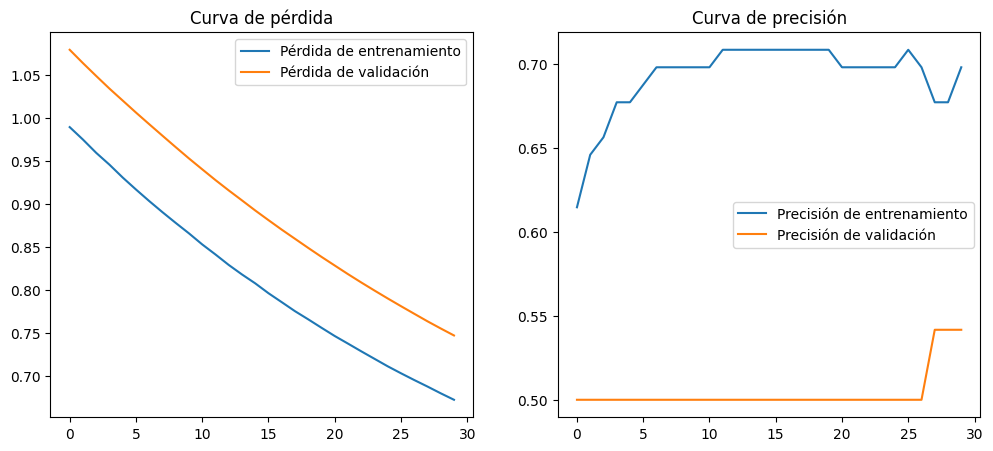

In [ ]:
# Visualizar el entrenamiento
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión')
plt.legend()
plt.show()

🔵 **Conclusiones del entrenamiento:**

1. Tendencia positiva en la precisión (accuracy)
accuracy de entrenamiento:
Comienza muy baja (8.46%) en la época 2 y sube consistentemente hasta ~55% en la época 30.
Esto indica que el modelo sí está aprendiendo del conjunto de entrenamiento.

val_accuracy (validación):
Empieza baja (12.5%) y mejora lentamente hasta alcanzar 41.67%.
Aunque la mejora es más lenta, es un progreso constante.

<br/>


2. Reducción de la pérdida (loss)
loss (entrenamiento):
Baja de 1.2109 a 0.9229, lo cual muestra que el modelo minimiza el error progresivamente.

val_loss (validación):
Disminuye de 1.2566 a 0.9675, lo que también indica que el modelo mejora su capacidad de generalización.

<br/>

🔵 **Qué revisar cuándo se tiene un val_accuracy lento?:**
1. Datos difíciles o desbalanceados

2. Pocas épocas (Epochs)

3. Arquitectura muy simple

4. Necesidad de mejorar el preprocesamiento

In [ ]:
# Evaluación final
loss, acc = model.evaluate(X_test, y_test)
print(f"\nPrecisión en test: {acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6000 - loss: 0.6935

Precisión en test: 0.60


# Finalmente....  Tabla de Casuísticas entre Accuracy y Loss


| # | Accuracy Entrenamiento | Accuracy Validación | Loss Entrenamiento | Loss Validación | Diagnóstico                            | Interpretación / Acción sugerida                                            |
| - | ---------------------- | ------------------- | ------------------ | --------------- | -------------------------------------- | --------------------------------------------------------------------------- |
| 1 | ↑                      | ↑                   | ↓                  | ↓               | ✅ Aprendizaje estable                  | El modelo **aprende y generaliza bien**. Continúa entrenando.               |
| 2 | ↑                      | ↔ o ↓               | ↓                  | ↑ o ↔           | ⚠️ Overfitting                         | Aprende solo el entrenamiento. Usa dropout, early stopping, más datos.      |
| 3 | ↔ o ↓                  | ↔ o ↓               | ↔ o ↑              | ↔ o ↑           | ❌ Underfitting                         | Modelo no está aprendiendo. Revisa arquitectura, datos, o entrena más.      |
| 4 | ↑                      | ↑                   | ↑                  | ↑               | ⚠️ Modelo no mejora pérdida            | Acumula errores altos aunque acierta. Revisa calibración de predicciones.   |
| 5 | ↑                      | ↑                   | ↓                  | ↑               | ⚠️ Overconfidence                      | El modelo se equivoca con mucha seguridad. Verifica distribución de clases. |
| 6 | ↑                      | ↔                   | ↓                  | ↓               | 🟡 Mejora lenta pero válida            | El modelo mejora internamente, pero aún no se refleja en accuracy.          |
| 7 | ↓                      | ↑                   | ↑                  | ↓               | 🔍 Curioso pero posible                | Modelo generaliza mejor que lo que aprende. Revisa datos de entrenamiento.  |
| 8 | ↑                      | ↑                   | ↔ o ↑              | ↓               | ⚠️ Acierta más, pero no mejora pérdida | Puede estar sobreajustado o con mala calibración. Monitorea más métricas.   |

